*   Marcelo Kiochi Hatanaka nº 10295645
*   Rodrigo Mendes Andrade nº 10262721
*   Marcelo Isaias de Moraes Junior nº 10550218




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import imageio
import cv2
from skimage import data, color
from skimage.transform import rescale, resize

In [4]:
altura = 240
largura = 320
n_imagens = 3
num_arquivos = 4

In [6]:
#adiciona ruido a imagem
def salt_n_pepper(img, rate=0.005):
  n, m = img.shape
  noisy = np.copy(img)

  for i in range(0, n):
    for j in range(0, m):
      num = np.random.randint(10000, size=1)
      if (num < rate*10000):
        noisy[i][j] = np.random.randint(2, size=1)*255

  return noisy

Pré-processamento da imagem para teste da Implementação Sequencial (minimizando recursos de hardware)

---



In [17]:
# le imagem de teste e realiza pre processamento
# resize, grayscale, noise
angry = imageio.imread("angry.jpeg")

image_resized = resize(angry, (altura, largura), anti_aliasing=True)
grayimage = color.rgb2gray(image_resized) * 255
img1 = grayimage.astype(np.uint8)
img1 = salt_n_pepper(img1)

(-0.5, 319.5, 239.5, -0.5)

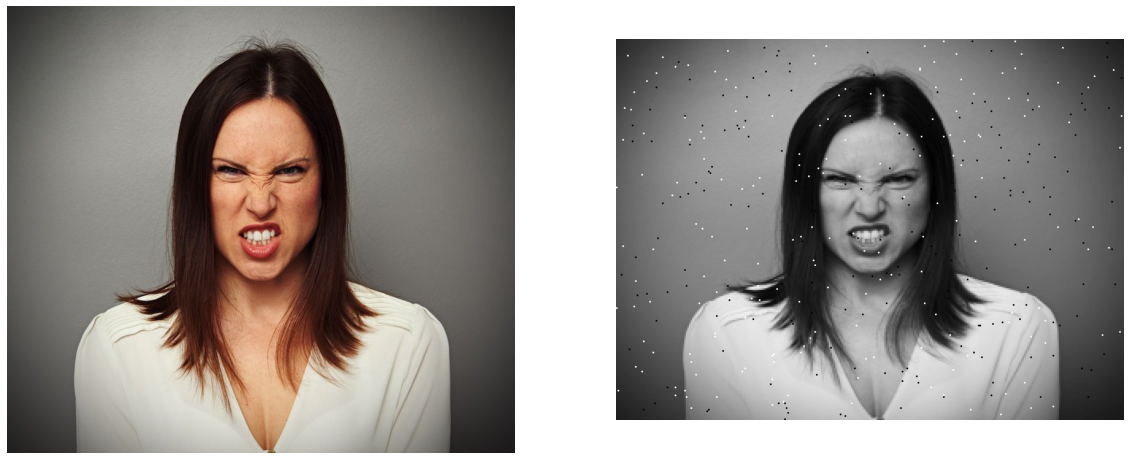

In [18]:
# compara imagem original com imagem pre-processada

plt.figure(figsize=(20, 20))
plt.subplot(121); plt.imshow(angry, cmap='gray', vmin=0, vmax=255); plt.axis('off')
plt.subplot(122); plt.imshow(img1, cmap='gray', vmin=0, vmax=255); plt.axis('off')

In [19]:
# escreve matriz da imagem dividida em 4 arquivos

nome_arquivo = list("inputImg0.txt")
num_arquivos = 4
t = len(nome_arquivo)
for k in range(0, num_arquivos):
  nome_arquivo[t-5] = str(int(nome_arquivo[t-5])+1)
  img_file = open("".join(nome_arquivo), "w")

  for i in range((k*altura)//num_arquivos, ((k+1)*altura)//4):
    for j in range(0, largura):
      img_file.write(str(img1[i][j])+" ")
      
  img_file.close()

Pré-processamento das imagens para teste da Implementação em Paralelo (maximizando throughput)

In [20]:
# importa imagens de teste

nome_imagem = list("imagem_teste1.jpg")
originais = []
t = len(nome_imagem)

for i in range(0, n_imagens):
  img = imageio.imread("".join(nome_imagem))
  originais.append(img)

  nome_imagem[t-5] = str(int(nome_imagem[t-5])+1)

In [13]:
# realiza pre processamento
# resize, grayscale, noise
imagens = []
resized = []

for i in range(0, n_imagens):

  image_resized = resize(originais[i], (altura, largura), anti_aliasing=True)
  resized.append(image_resized)

  grayimage = color.rgb2gray(image_resized) * 255
  grayimage = grayimage.astype(np.uint8)
  imagens.append(salt_n_pepper(grayimage, 0.005))

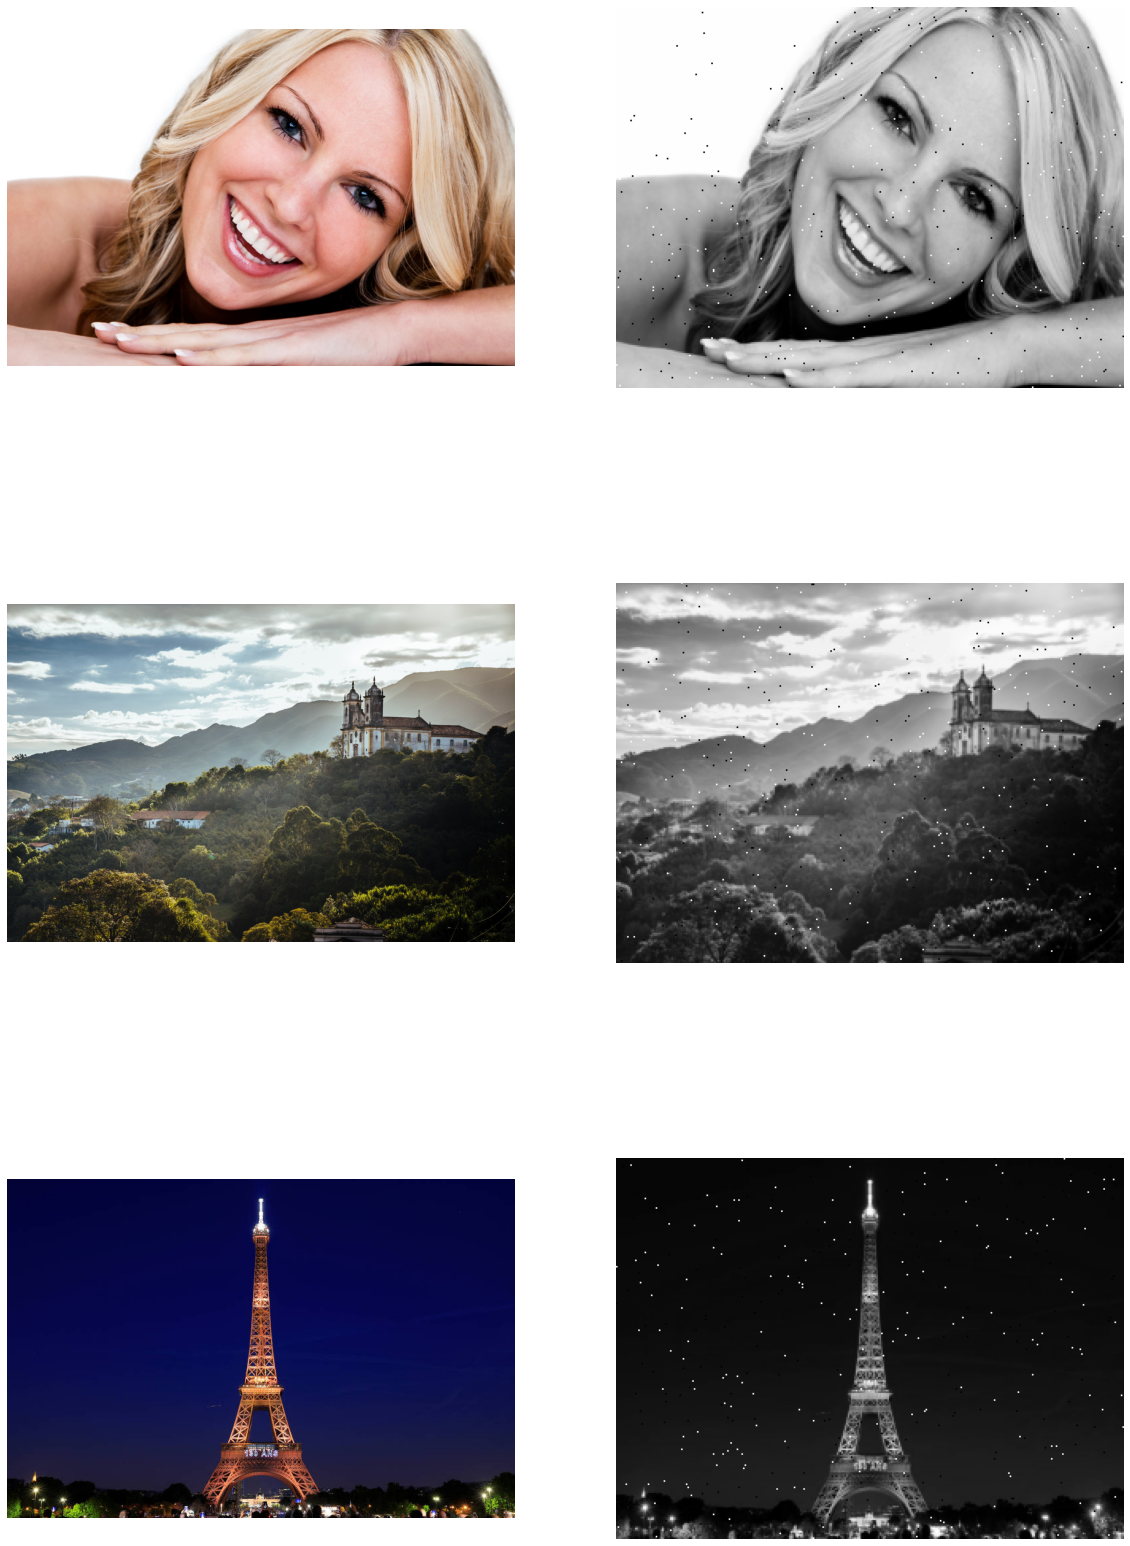

In [15]:
# compara imagens originais com imagens pre-processadas

plt.figure(figsize=(20, 10*n_imagens))
for i in range(0, n_imagens):
  plt.subplot(n_imagens, 2, i*2+1); plt.imshow(originais[i], cmap='gray', vmin=0, vmax=255); plt.axis('off')
  plt.subplot(n_imagens, 2, i*2+2); plt.imshow(imagens[i], cmap='gray', vmin=0, vmax=255); plt.axis('off') 

In [16]:
# escreve n imagens cada uma dividida em 4 arquivos
nome_arquivo = list("inputImgA1.txt")
t = len(nome_arquivo)
bloco = altura//num_arquivos

for k in range (0, n_imagens):
  for l in range(0, num_arquivos):
  
    img_file = open("".join(nome_arquivo), "w")

    for i in range(l*bloco, (l+1)*bloco):
      for j in range(0, largura):
        img_file.write(str(imagens[k][i][j])+" ")

    img_file.close()
    nome_arquivo[t-5] = str(int(nome_arquivo[t-5])+1)
  
  nome_arquivo[t-6] = chr(ord(nome_arquivo[t-6])+1)
  nome_arquivo[t-5] = str(int(nome_arquivo[t-5])-(num_arquivos))